In [30]:
# --- 1. System Setup ---
import sys
import os
import pandas as pd

# Add parent directory to path to allow importing from 'src'
# Assumes this notebook is in a 'notebooks/' folder
sys.path.append(os.path.abspath('..'))

# --- IMPORT FROM SRC (Exactly matching main.py) ---
from src.data_loader import load_data, clean_data
from src.feature_engineering import add_domain_features, build_model_pipeline
from src.model_trainer import split_data, evaluate_model, generate_risk_report, plot_roc_curve

print("Project modules loaded successfully.")

Project modules loaded successfully.


In [31]:
# --- 2. Pipeline Execution ---

# 1. Loading and cleaning data
# Note: Adjusted path '../data' assuming notebook is in a subfolder
DATA_PATH = os.path.join('..', 'data', 'Telco-Customer-Churn.csv')

if not os.path.exists(DATA_PATH):
    print(f"Error: Data file not found at {DATA_PATH}")
else:
    print("1. Loading and cleaning data...")
    df = load_data(DATA_PATH)
    df = clean_data(df)

    # 2. Generating domain features
    print("2. Generating domain features...")
    df = add_domain_features(df)

    # Manual Target Mapping (Matches main.py logic)
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # 3. Splitting data
    print("3. Splitting data...")
    X_train, X_test, y_train, y_test = split_data(df, target='Churn')

    # 4. Training Pipeline
    print("4. Training Pipeline (Preprocessing + Model)...")
    model_pipeline = build_model_pipeline()
    model_pipeline.fit(X_train, y_train)
    
    print("Training complete.")

1. Loading and cleaning data...
2. Generating domain features...
3. Splitting data...
4. Training Pipeline (Preprocessing + Model)...
Training complete.


5. Evaluating model...

--- Classification Report (Threshold: 0.3) ---
              precision    recall  f1-score   support

           0       0.94      0.55      0.69      1033
           1       0.42      0.90      0.57       374

    accuracy                           0.64      1407
   macro avg       0.68      0.73      0.63      1407
weighted avg       0.80      0.64      0.66      1407



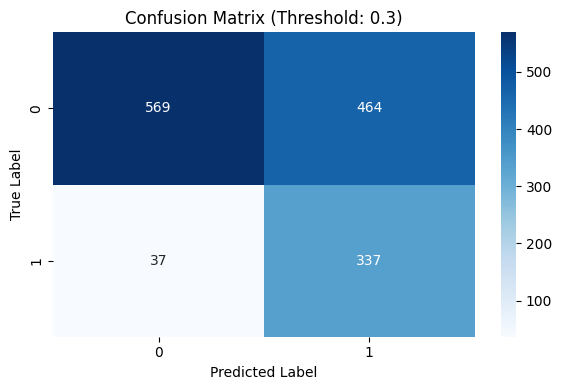

In [32]:
# --- 3. Evaluate Model ---
print("5. Evaluating model...")
evaluate_model(model_pipeline, X_test, y_test, threshold=0.3)

In [33]:
# --- 4. Generate Risk Report ---
print("\n6. Generating Full Risk Report...")

# Generate report (Using X_test to match main.py)
full_report = generate_risk_report(model_pipeline, X_test)

print("\n--- REPORT PREVIEW (Top 5 Highest Risk) ---")
print(full_report.head(5).to_string(index=False))

# Save to CSV (Saved in current directory)
full_report.to_csv("all_customers_risk_report.csv", index=False)
print("\nFull report saved to 'all_customers_risk_report.csv'")


6. Generating Full Risk Report...

--- REPORT PREVIEW (Top 5 Highest Risk) ---
customerID  Churn_Probability Risk_Level       Contract  MonthlyCharges
5178-LMXOP           0.960488  High Risk Month-to-month           95.10
6857-VWJDT           0.958122  High Risk Month-to-month           95.65
1069-XAIEM           0.957847  High Risk Month-to-month           85.05
8375-DKEBR           0.953095  High Risk Month-to-month           69.60
3722-WPXTK           0.949763  High Risk Month-to-month           88.35

Full report saved to 'all_customers_risk_report.csv'


Generating ROC Curve...


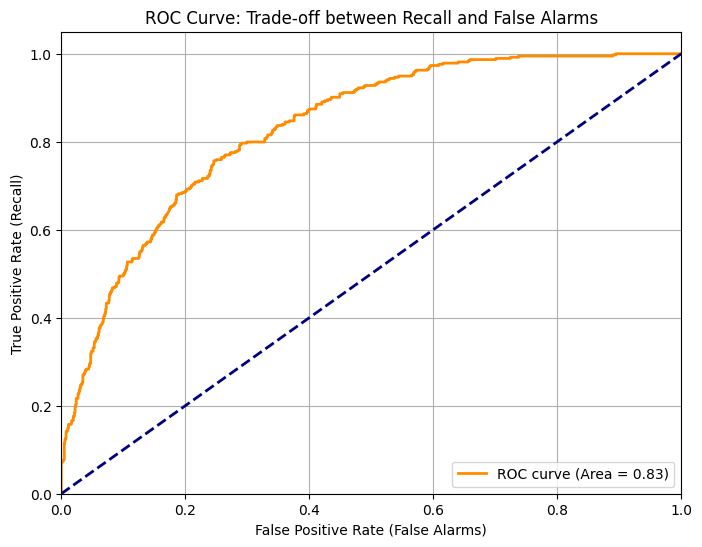

In [34]:
# --- 5. ROC Curve ---
print("Generating ROC Curve...")
plot_roc_curve(model_pipeline, X_test, y_test)